<a href="https://colab.research.google.com/github/rudra404/NLP-RNN-Emotions-Classification/blob/main/data_analysis_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GoEmotions data analysis and visualisation

This notebook is used to get a better understanding of the data that we are dealing with.
Comparisons will be made in the report using the graphs and charts generated from this notebook.



---


### Data Preprocessing

Loading the dataset and getting it ready to be used. The group has also decided to use the same labels and made decisions regarding merging or deleting labels. Analysis is performed both before, and after the merging of labels - however, more focus is on the dataset used by us after merging.


---



In [ ]:
# Install required packages
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from datasets import load_dataset
import pandas as pd

# load the GoEmotions dataset
goemotions_dataset = load_dataset('go_emotions')

# get the train, validation, and test splits as Pandas dataframes
train_df = goemotions_dataset['train'].to_pandas()
val_df = goemotions_dataset['validation'].to_pandas()
test_df = goemotions_dataset['test'].to_pandas()

# concatenate the splits into a single dataframe
df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# duplicate the records with multiple labels
df = df.explode('labels')

# reset the index of the dataframe
df = df.reset_index(drop=True)


  0%|          | 0/3 [00:00<?, ?it/s]



---


## Overview of original dataset before merging labels + Class Distribution


---



---



First 5 rows of the data: 
                                                text labels       id
0  My favourite food is anything I didn't have to...     27  eebbqej
1  Now if he does off himself, everyone will thin...     27  ed00q6i
2                     WHY THE FUCK IS BAYLESS ISOING      2  eezlygj
3                        To make her feel threatened     14  ed7ypvh
4                             Dirty Southern Wankers      3  ed0bdzj

Shape of the dataset: (63812, 3)

Null values in the dataset: 
text      0
labels    0
id        0
dtype: int64

Comment 1:
 It might be linked to the trust factor of your friend.
Comment 2:
 Demographics? I don’t know anybody under 35 who has cable tv.
Comment 3:
 Aww... she'll probably come around eventually, I'm sure she was just jealous of [NAME]... I mean, what woman wouldn't be! lol 
Comment 4:
 Aww... she'll probably come around eventually, I'm sure she was just jealous of [NAME]... I mean, what woman wouldn't be! lol 
Comment 5:
 Hello everyone

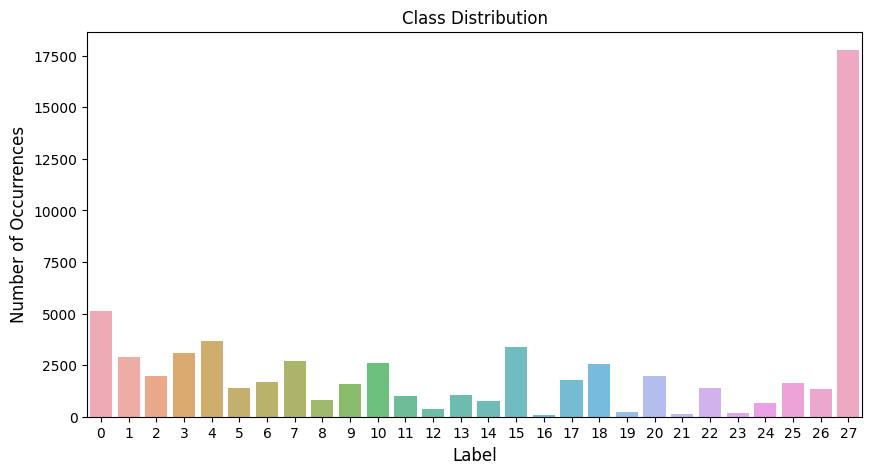

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from collections import OrderedDict

print(f'First 5 rows of the data: \n{df.head()}') # print the first five rows of the resulting dataframe
print(f'\nShape of the dataset: {df.shape}') # check the shape of dataset
print(f'\nNull values in the dataset: \n{df.isnull().sum()}\n') # check for null values

# the following code has been adapted from https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
for index,text in enumerate(df['text'][10:20]):
  print('Comment %d:\n'%(index+1),text)

# Plotting the class distribution - the following code has been generated using chatGPT and changed
print('\nClass Distribution: \n')

# count instances for each 'label'
class_dist = df['labels'].value_counts()
# plot a diagram
plt.figure(figsize=(10, 5))
sns.barplot(x=class_dist.index, y=class_dist.values, alpha=0.8)
plt.title('Class Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()


#### merging and deleting labels / instances

In [ ]:
from torchtext.data.functional import to_map_style_dataset

### MERGING EMOTION LABELS FROM GROUP DECISIONS ###

for i, row in df.iterrows():
  # Converting Annoyance [3] into Anger [2]
  if row['labels']==3:
    row['labels']=2
  # Disappointment [9] and Grief [16] into Sadness [25]
  if row['labels']==9 or row['labels']==16:
    row['labels']=25
  # Converting Nervousness [19] into Fear [14]
  if row['labels']==19:
    row['labels']=14
  # Converting Excitement [13] into Joy [17]
  if row['labels']==13:
    row['labels']=17

#keeps just one of the records where there are labelled with both merged classes
df = df.drop_duplicates(keep = 'first')
drop_labels = (3,11,12,9,16,19,22,26,21,13,0,23,20,5)
#drops labels we are not using
df_cut = df[~df.labels.isin(drop_labels)]
#deletes duplicates
df_cut = df_cut.drop_duplicates(subset = ['text'], keep = False)
df_cut = df_cut.reset_index(drop = True)

### REORDERING SO THAT LABELS ARE 0-13 ###
for i, row in df_cut.iterrows():
    # Converting Neutral [27] to Neutral [0]
    if row['labels']==27:
        row['labels']=0
    # Converting Sadness [25] to Sadness [3]
    if row['labels']==25:
        row['labels']=3
    # Converting Remorse [24] to Remorse [5]
    if row['labels']==24:
        row['labels']=5
    # Converting Love [18] to Love [9]
    if row['labels']==18:
        row['labels']=9
    # Converting Fear [14] to Fear [11]
    if row['labels']==14:
        row['labels']=11
    # Converting Gratitude [15] to Gratitude [12]
    if row['labels']==15:
        row['labels']=12
    # Converting Joy [17] to Joy [13]
    if row['labels']==17:
        row['labels']=13

df = df_cut
# reset the index of the dataframe
df = df.reset_index(drop=True)


So now only the chosen labels remain and they are ordered from 0-13 (expected by pyTorch at a later stage).<br>
<br>
We also save the dataset at this point so it can be reused for the remaining experiments (which are originally carried out in separate notebooks)



---


## Overview of dataset after merging labels + Class Distribution


---



---



First 5 rows of the data: 
                                                text labels       id
0  My favourite food is anything I didn't have to...      0  eebbqej
1  Now if he does off himself, everyone will thin...      0  ed00q6i
2                     WHY THE FUCK IS BAYLESS ISOING      2  eezlygj
3                        To make her feel threatened     11  ed7ypvh
4                             Dirty Southern Wankers      2  ed0bdzj

Shape of the dataset: (41131, 3)

Preview of some comments: 

Comment 1:
 [NAME] - same fucking problem, slightly better command of the English language.
Comment 2:
 Shit, I guess I accidentally bought a Pay-Per-View boxing match
Comment 3:
 Thank you friend
Comment 4:
 Fucking coward.
Comment 5:
 that is what retardation looks like
Comment 6:
 Maybe that’s what happened to the great white at Houston zoo
Comment 7:
 You are going to do the dishes now
Comment 8:
 Slowing things down now
Comment 9:
 His name has already been released. Just can't post it 

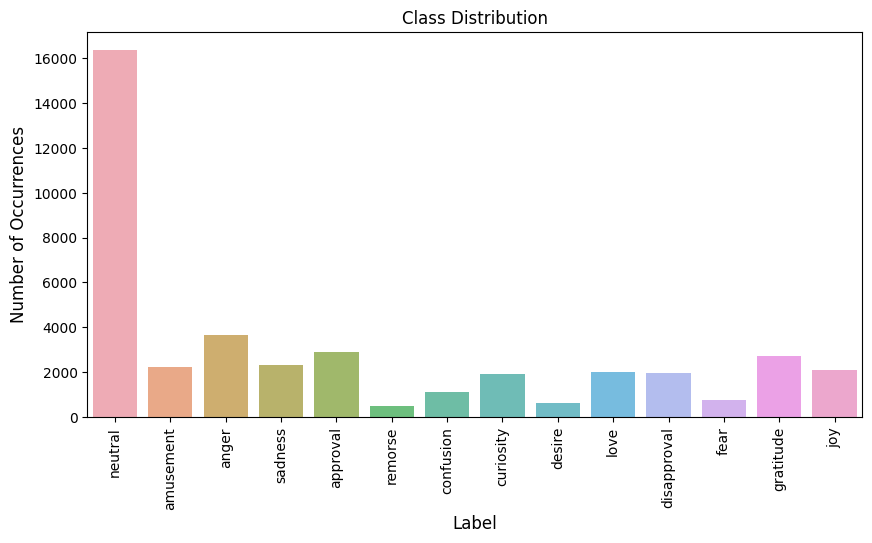


Class Distribution Values: 

neutral: 16354 instances
amusement: 2237 instances
anger: 3639 instances
sadness: 2304 instances
approval: 2898 instances
remorse: 497 instances
confusion: 1130 instances
curiosity: 1932 instances
desire: 605 instances
love: 2022 instances
disapproval: 1940 instances
fear: 758 instances
gratitude: 2741 instances
joy: 2074 instances


In [ ]:

print(f'First 5 rows of the data: \n{df.head()}') # print the first five rows of the resulting dataframe
print(f'\nShape of the dataset: {df.shape}') # check the shape of dataset

# the following code has been adapted from https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
print('\nPreview of some comments: \n')
for index,text in enumerate(df['text'][10:20]):
  print('Comment %d:\n'%(index+1),text)

# Plotting the class distribution - the following code has been generated using chatGPT and changed
print('\nClass Distribution: \n')
# count instances for each 'label'
class_dist = df['labels'].value_counts()
# plot a diagram
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
plt.figure(figsize=(10, 5))
sns.barplot(x=class_dist.index, y=class_dist.values, alpha=0.8)
plt.xticks(rotation=90)
plt.gca().set_xticklabels(labels)
plt.title('Class Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()

# print the class distribution to get exact values
print('\nClass Distribution Values: \n')
for label, count in sorted(class_dist.items(), key=lambda x: int(x[0])):
    print(f"{list(labels.keys())[label]}: {count} instances")


Generating word clouds for each label to observe the most common words being used in reddit comments which are classified as the particular emotion. This is after we have processed the data and merged/dropped labels. It will give us a better look at whether or not the labels merging makes sense or not.

### Word Clouds for each label

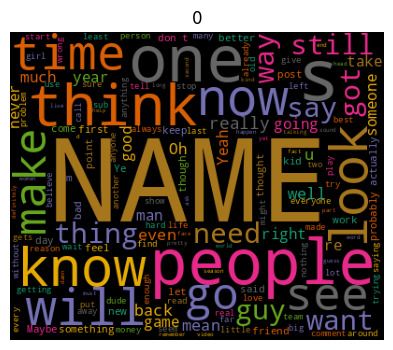

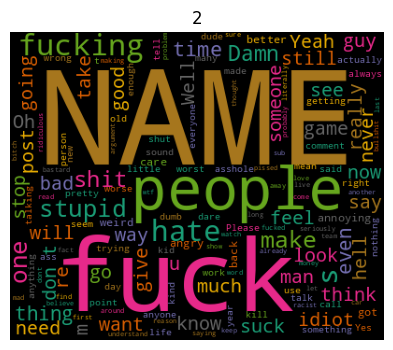

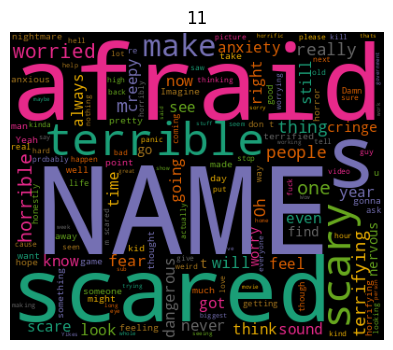

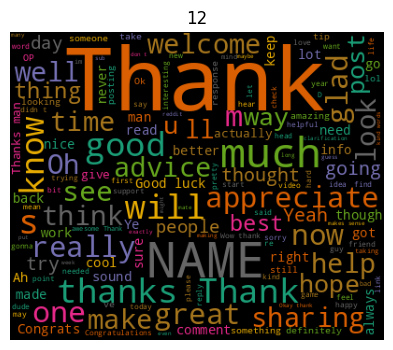

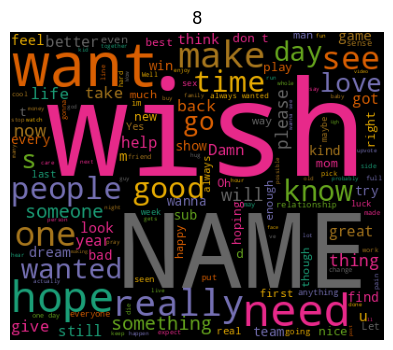

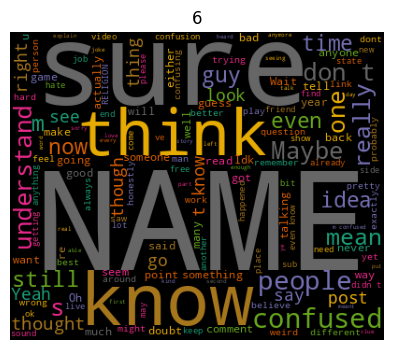

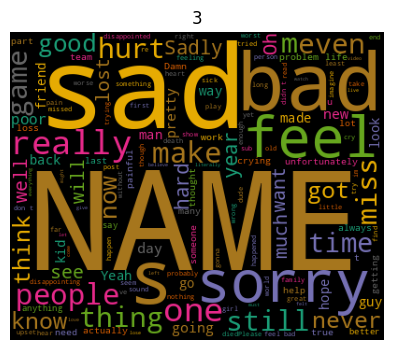

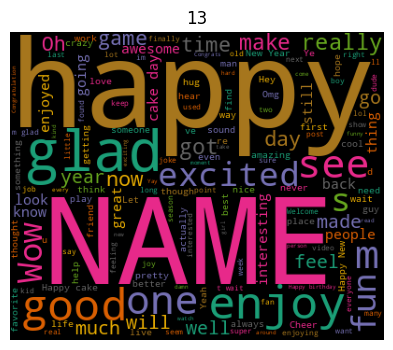

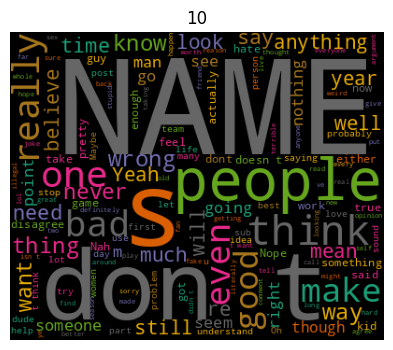

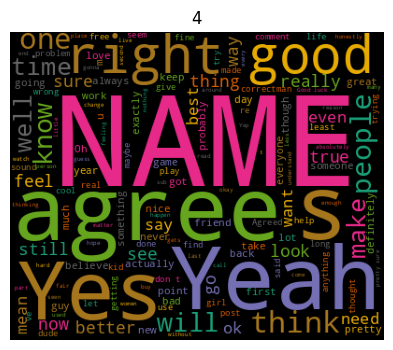

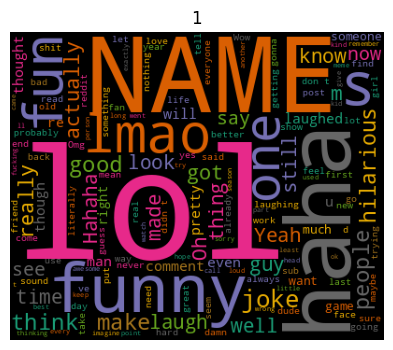

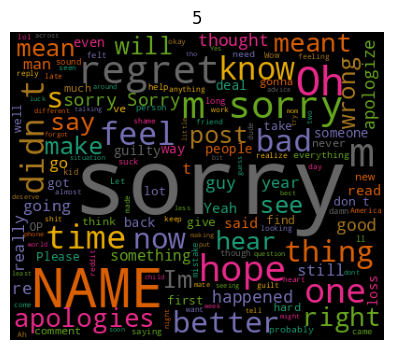

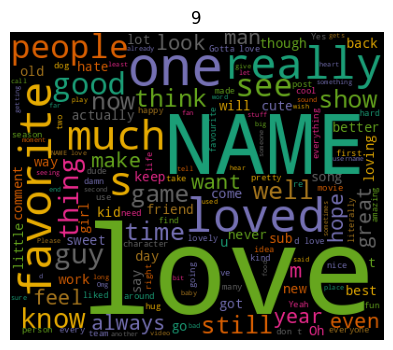

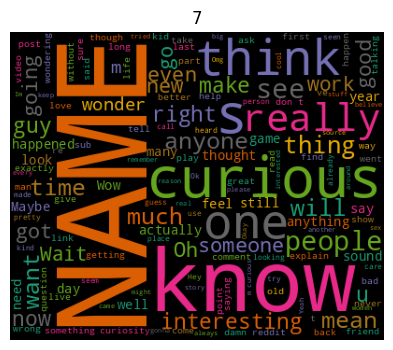

In [ ]:
# the following code has been adapted from several sources including the website mentioned above and chatGPT
# heavy debugging and a different approach was required to make it work

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a dictionary to store the text data for each label
label_text = {}
for label in df['labels'].unique():
    text = ' '.join(df[df['labels'] == label]['text'].tolist())
    label_text[label] = text

# Create a WordCloud for each label and display it
for label, text in label_text.items():
    wordcloud = WordCloud(width=400, height=330, max_words=150, colormap="Dark2").generate(text)
    plt.figure(figsize=(5, 4))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(label)
    plt.show()
    print('\n')

### Text count by length

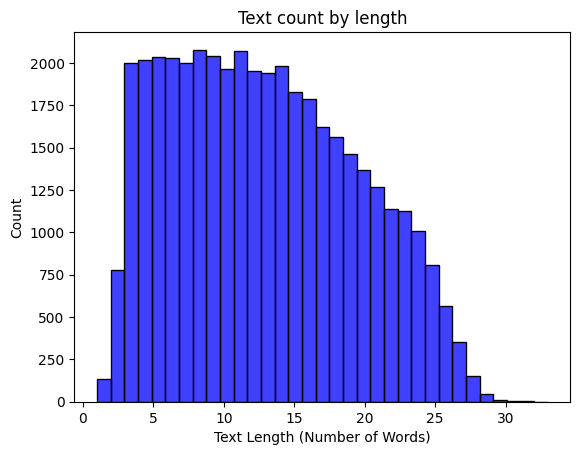

In [ ]:
# Create a list of text lengths
text_lengths = df['text'].str.split().apply(len)

# Plot histogram
sns.histplot(text_lengths, color='blue', bins=33)
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Count')
plt.title('Text count by length')
plt.show()

### Average text length by label

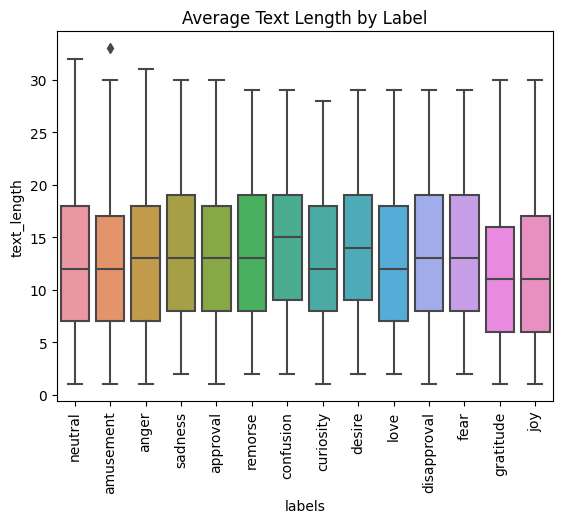

In [ ]:
# average text length for each label
df['text_length'] = df['text'].apply(lambda x: len(x.split()))
# Add labels and title
plt.xlabel('Label')
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
plt.ylabel('Text Length')
plt.title('Average Text Length by Label')
# Create boxplot
sns.boxplot(x='labels', y='text_length', data=df)
plt.xticks(rotation=90)
plt.gca().set_xticklabels(labels)
plt.show()


### n-grams

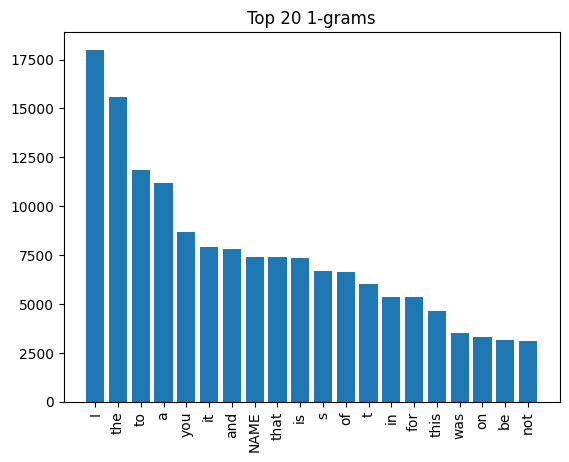

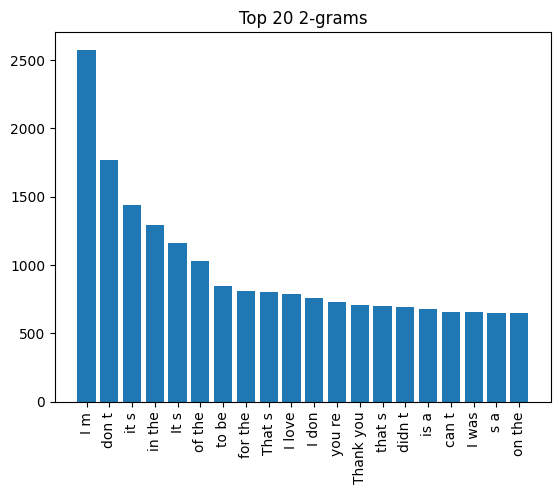

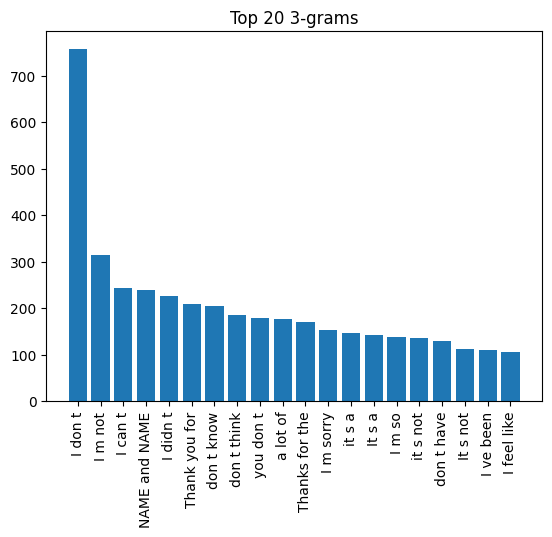

In [ ]:
# used chatGPT, Lab 1, and https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a
# all above sources were only used as reference and I had to debug and implement most of it

import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer
from nltk.util import ngrams
from collections import Counter

# Load dataframe
df2 = df
# Tokenize the text column
tokenizer = RegexpTokenizer(r"\w+")
df2['tokens'] = df2['text'].apply(tokenizer.tokenize)

# define a function to plot ngrams frequency distribution based on entered 'n' value
def plotngrams(n):
  # Generate n-grams
  ngrams_list = []
  for tokens in df2['tokens']:
      ngrams_list += list(ngrams(tokens, n))

  # Get the most common n-grams
  top_ngrams = Counter(ngrams_list).most_common(20)

  # Convert n-grams to strings
  top_ngrams_str = [' '.join(ng) for ng, count in top_ngrams]

  # Create plot of top n most common n-grams
  plt.bar(range(len(top_ngrams_str)), [count for ng, count in top_ngrams], tick_label=top_ngrams_str)
  plt.xticks(rotation=90)
  plt.title(f"Top 20 {n}-grams")
  plt.show()
  print('\n')

plotngrams(1)
plotngrams(2)
plotngrams(3)



---



---



---



#### Splitting the dataset into train-test-val

We will now check if the training dataset reflects the characterisitcs of the main dataset

In [ ]:
# splitting the dataset into test-train-valid subsets
from torch.utils.data import random_split

# convert dataframe to list
text = df[['text','labels']].values.tolist()

# convert the dataset into a "map-style dataset"
data = to_map_style_dataset(text)

split_ratio = 0.7  # 70/30 split

# split dataset into train and test sets
train_samples = int(split_ratio * len(data))
test_samples = len(data) - train_samples
train_data, test_data = random_split(data, [train_samples, test_samples])

# split train subset into train and validation sets
train_samples = int(split_ratio * len(train_data))
valid_samples = len(train_data) - train_samples
train_data, valid_data = random_split(train_data, [train_samples, valid_samples])

print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')
print(f'Number of testing examples: {len(test_data)}')

Number of training examples: 20153
Number of validation examples: 8638
Number of testing examples: 12340


In [ ]:
# convert back to a df after splitting the dataset
text = [row[0] for row in train_data]
labels = [row[1] for row in train_data]
train_df = pd.DataFrame({'text': text, 'labels': labels})

---
## Overview of training dataset + Class Distribution
---

First 5 rows of the data: 
                                                text  labels
0  All the time here! Say have kid an ex wife and...       0
1  Someone who seems great while texting might no...      10
2  For most people after 4 to 5 hours it gets up ...       4
3  Oh certainly this winter has been mild. It jus...       0
4  For games starting at 7, the bus was leaving t...       0

Shape of the dataset: (20153, 2)

Preview of some comments: 

Comment 1:
 Good luck! It's a long road ahead for us :P i have a job interview next week and i'm going all in for it.
Comment 2:
 Those Boys risked their lives for a strong independent woman.
Comment 3:
 How? That’s silly. Clearly Lowries impact is higher.
Comment 4:
 Real lpt always in the comments
Comment 5:
 He happily accepts the hugs. He hugs me now and again. He also has no problem accepting hugs from his mum.
Comment 6:
 Some reasonable Seahawks fans credit him with [NAME] development.
Comment 7:
 She's going to OD without a clue t

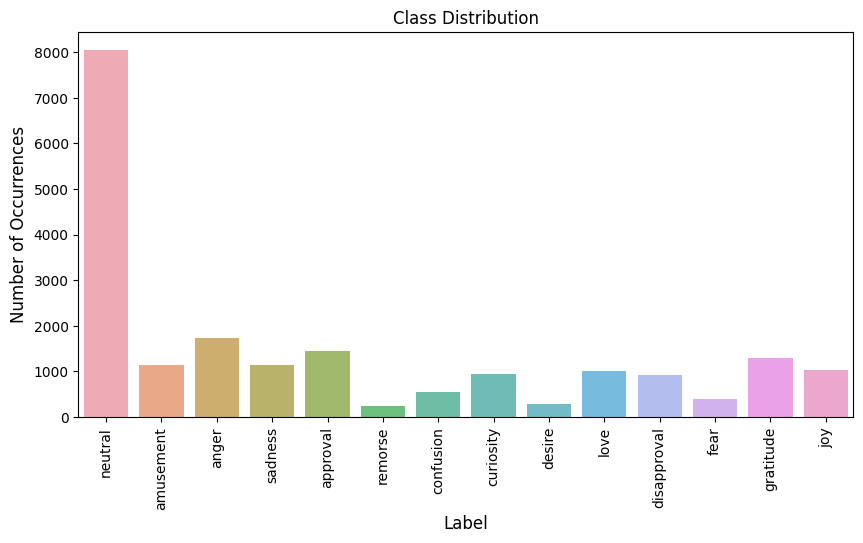


Class Distribution Values: 

neutral: 8039 instances
amusement: 1137 instances
anger: 1737 instances
sadness: 1132 instances
approval: 1437 instances
remorse: 242 instances
confusion: 553 instances
curiosity: 946 instances
desire: 285 instances
love: 1012 instances
disapproval: 923 instances
fear: 384 instances
gratitude: 1297 instances
joy: 1029 instances


In [ ]:

print(f'First 5 rows of the data: \n{train_df.head()}') # print the first five rows of the resulting dataframe
print(f'\nShape of the dataset: {train_df.shape}') # check the shape of dataset

# the following code has been adapted from https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/
print('\nPreview of some comments: \n')
for index,text in enumerate(train_df['text'][10:20]):
  print('Comment %d:\n'%(index+1),text)

# Plotting the class distribution - the following code has been generated using chatGPT and changed
print('\nClass Distribution: \n')
# count instances for each 'label'
class_dist = train_df['labels'].value_counts()
# plot a diagram
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
plt.figure(figsize=(10, 5))
sns.barplot(x=class_dist.index, y=class_dist.values, alpha=0.8)
plt.xticks(rotation=90)
plt.gca().set_xticklabels(labels)
plt.title('Class Distribution')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Label', fontsize=12)
plt.show()

# print the class distribution to get exact values
print('\nClass Distribution Values: \n')
for label, count in sorted(class_dist.items(), key=lambda x: int(x[0])):
    print(f"{list(labels.keys())[label]}: {count} instances")


### Text count by length

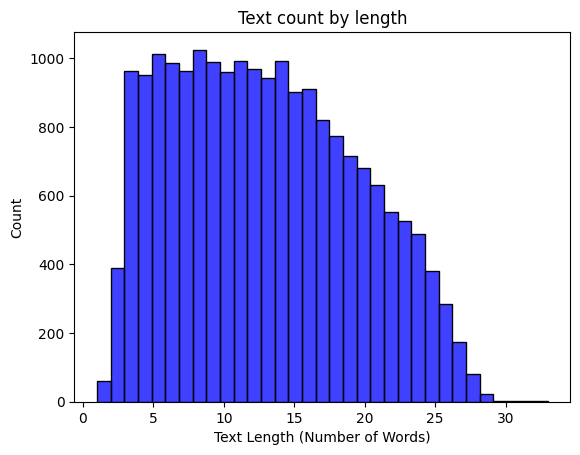

In [ ]:
# Create a list of text lengths
text_lengths = train_df['text'].str.split().apply(len)

# Plot histogram
sns.histplot(text_lengths, color='blue', bins=33)
plt.xlabel('Text Length (Number of Words)')
plt.ylabel('Count')
plt.title('Text count by length')
plt.show()

### Average text length by label

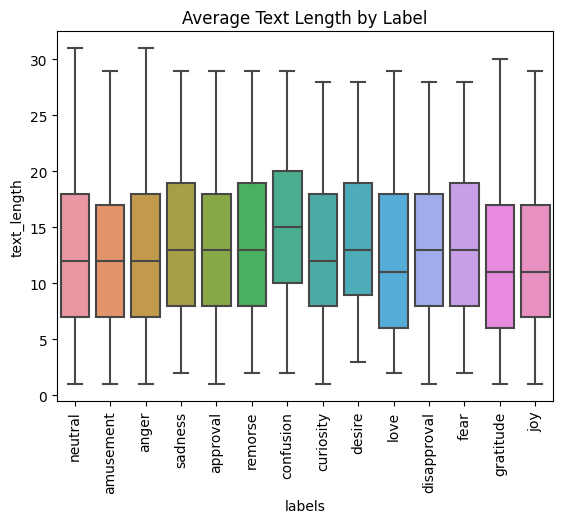

In [ ]:
# average text length for each label
train_df['text_length'] = train_df['text'].apply(lambda x: len(x.split()))
# Add labels and title
plt.xlabel('Label')
labels = OrderedDict([("neutral", 1), ("amusement", 1), ("anger", 1), ("sadness", 1), ("approval", 1), ("remorse", 1), ("confusion", 1), ("curiosity", 1), ("desire", 1), ("love", 1), ("disapproval", 1), ("fear", 1), ("gratitude", 1), ("joy", 1)])
plt.ylabel('Text Length')
plt.title('Average Text Length by Label')
# Create boxplot
sns.boxplot(x='labels', y='text_length', data=train_df)
plt.xticks(rotation=90)
plt.gca().set_xticklabels(labels)
plt.show()




---



---



---

Thus, we now have a better idea of the dataset and how it has been modified for this project